In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Build the model

In [20]:
# Build a small sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform', bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax')
])

In [21]:
# Display the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### Examine the weight matrix variation over training

In [22]:
# Retrive the weights and biases

W0_layers = [e.weights[0].numpy() for e in model.layers]
b0_layers = [e.bias.numpy() for e in model.layers]

In [23]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [24]:
# Compile and fit the model

model.compile(optimizer='adam',
            loss='mse',
            metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [25]:
# Retrieve the weights and biases

W1_layers = [e.weights[0].numpy() for e in model.layers]
b1_layers = [e.bias.numpy() for e in model.layers]

Layer 0: bias variation:  0.16677839
Layer 1: bias variation:  0.16875759
Layer 2: bias variation:  0.29948202


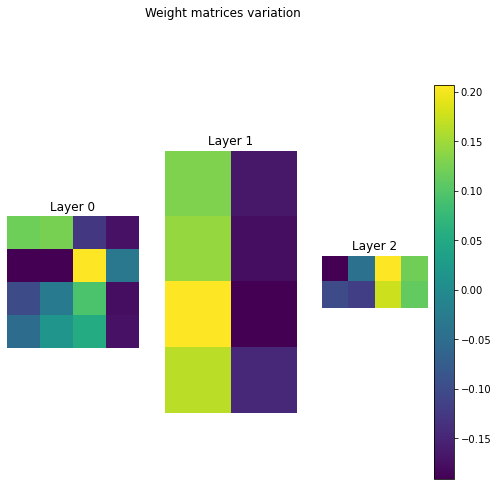

In [27]:
# Plot the variation 

plt.figure(figsize=(8,8))
for n in range(3):
    delta_1 = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(delta_1)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

In [31]:
def get_weights(model):
    return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
    return [e.bias.numpy() for e in model.layers]

def plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_1 = W1_layers[n] - W0_layers[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1, 3, n+1)
        plt.imshow(delta_1)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');

### Freeze layers at build time

In [49]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

print(n_trainable_variables)
print(n_non_trainable_variables)

2
4


In [50]:
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform', bias_initializer='ones', trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax')
])

In [51]:
# After freezing 

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

print(n_trainable_variables)
print(n_non_trainable_variables)

4
2


In [52]:
W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [53]:
# Compile and fit the model

model.compile(optimizer='adam',
            loss='mse',
            metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [54]:
W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.06808269
Layer 2: bias variation:  0.12554279


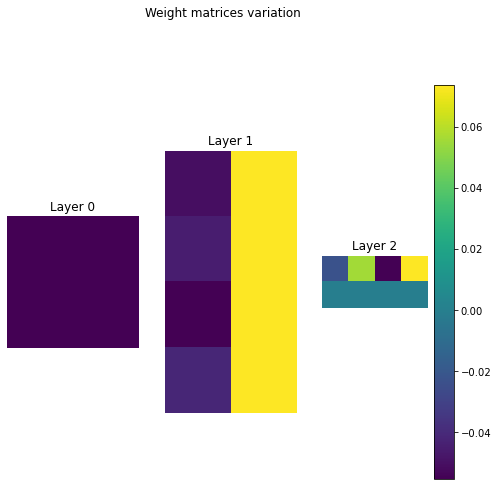

In [55]:
plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

### Freeze layers of a pre-built model

In [56]:
model.layers[1].trainable=False

In [57]:
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

print(n_trainable_variables)
print(n_non_trainable_variables)

2
4


In [58]:
# Compile and fit the model

model.compile(optimizer='adam',
            loss='mse',
            metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [59]:
W2_layers = get_weights(model)
b2_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.026265144


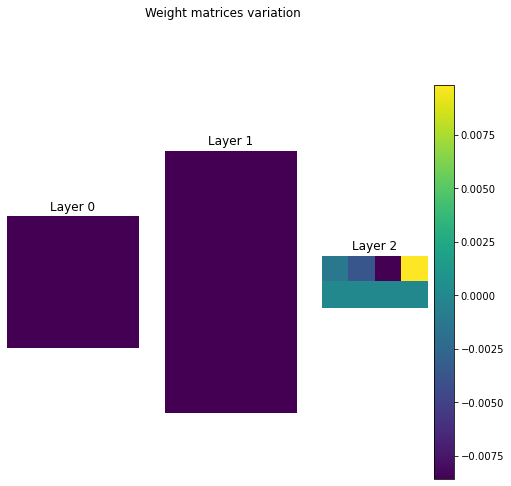

In [61]:
plot_delta_weights(W1_layers, W2_layers, b1_layers, b2_layers)